# Import Libraries

In [249]:
from gurobipy import *
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pysd
import pandas as pd
import numpy as np
import geopandas as gp
import zipfile
import requests
import networkx as nx
import matplotlib.cm
import math
from math import radians, sin, cos, acos
from geopy.distance import geodesic
import requests
from bs4 import BeautifulSoup
from osgeo import ogr, osr
import matplotlib.cm as cmx
import matplotlib.colors as colors
from Circles.circles import circle
from shapely.geometry import Polygon, Point
from descartes import PolygonPatch
from shapely.ops import cascaded_union
import pickle
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import datacompy
import warnings
warnings.filterwarnings("ignore")


# Import Input Data (Model Parameters)

In [250]:
with open('Case3FinalDataParameters', 'rb') as fp:
    mhi = pickle.load(fp)
    chi = pickle.load(fp)
    Qi = pickle.load(fp)
    uio = pickle.load(fp)
    cio = pickle.load(fp)
    capi = pickle.load(fp)
    xiiinit = pickle.load(fp)
    B = pickle.load(fp)
    Pi = pickle.load(fp)
    Tcost = pickle.load(fp)

with open('Case3compDPs', 'rb') as fp:
    compDPslist = pickle.load(fp)
    compviablelist = pickle.load(fp)

with open('Case3Fijlist', 'rb') as fp:
    compFijlist = pickle.load(fp)

with open('Case3compcij', 'rb') as fp:
    compcijlist = pickle.load(fp)

with open('Case3compmij', 'rb') as fp:
    compmijlist = pickle.load(fp)



In [251]:
DPslist = compDPslist[-1][:1]
cijlist = compcijlist[-1][:1]
Fijlist = compFijlist[-1][:1]
mijlist = compmijlist[-1][:1]
period = 0

In [252]:
compviablelist[-1][0]

,ForecastHour,Latitude,Longitude,Intensity
0,0,10,129,140
0,0,10.5,127,140
0,0,11,125,130
0,0,11.5,122.5,125
1,6,12,120.5,120
2,12,12.5,118.5,115
3,18,13,116.5,112.5


In [253]:
compDPslist[-1][0]

,Province_x,District_x,Code,Name,Municipality,latitude,longitude,Population,District_y,Region,Province_y,Number,ActualDemand,Supply,PrepTime
0,AKLAN,lone,60416000,AklanL,NUMANCIA,11.717074,122.338522,535725,lone,R VI,AKLAN,17,52832.0,0,0
1,ANTIQUE,lone,60604000,AntiqueL,BUGASONG,11.051077,122.080397,546031,lone,R VI,ANTIQUE,18,0.0,1,1000
2,CAPIZ,1st,61912000,Capiz1,PONTEVEDRA,11.451069,122.853870,387629,1st,R VI,CAPIZ,7,38985.0,0,0
3,CAPIZ,2nd,61916000,Capiz2,SIGMA,11.424189,122.661718,332056,2nd,R VI,CAPIZ,10,31961.0,0,0
4,ILOILO,4th,63017000,Iloilo4,DUENAS,11.053814,122.587664,364050,4th,R VI,ILOILO,8,36548.0,1,0
5,ILOILO,1st,63020000,Iloilo1,GUIMBAL,10.678628,122.311062,342788,1st,R VI,ILOILO,7,0.0,1,1000
6,ILOILO,lone,63022000,IloiloL,ILOILO CITY,10.707602,122.559011,424619,lone,R VI,ILOILO,1,0.0,1,1000
7,ILOILO,3rd,63023000,Iloilo3,JANIUAY,10.977296,122.468025,408893,3rd,R VI,ILOILO,9,37723.0,1,0
8,ILOILO,5th,63044000,Iloilo5,SARA,11.265968,123.006619,405435,5th,R VI,ILOILO,11,39659.0,0,0
9,ILOILO,2nd,63047000,Iloilo2,ZARRAGA,10.833484,122.625481,284410,2nd,R VI,ILOILO,8,0.0,1,1000


In [254]:
Fijlist[0] = Fijlist[0]*0+1000

In [266]:
with open('ResultCase3REL', 'rb') as fp:
    ADFlist = pickle.load(fp)
    BDFlist = pickle.load(fp)
    BDF2list = pickle.load(fp)
    keylist = pickle.load(fp)
    Qilist = pickle.load(fp)
    Tcostlist = pickle.load(fp)
    xiiinitlist = pickle.load(fp)
    Pilist = pickle.load(fp)
    yijmasterlist = pickle.load(fp)
    yhimasterlist = pickle.load(fp)
    extratimelist = pickle.load(fp)
    preptimelist = pickle.load(fp)

In [267]:
keylist

[1, 5, 4, 5, 1, 2, 0, 1, 17]

In [ ]:
xiiinitlist[-1]

In [ ]:
yhinew = yhimasterlist[-1].copy()

In [ ]:
aa = ADFlist[-6].iloc[keylist[-6],:]
aa = aa.iloc[8:]

In [268]:
yhimasterlist[2]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,47114.0,47151.0,52500.0,0.0,0.0,0.0,0.0,0.0,0.0,26036.0,7500.0,0.0,33718.0,0.0,0.0,0.0,0.0,13325.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
yhinew = yhitemplate.copy()
yhinew.iloc[20,:] = aa
yhinew.iloc[20,20] = 0

In [260]:
# yhinew = yhitemplate

In [271]:
yhinew = yhimasterlist[-3]

In [272]:
yhilist.append(yhinew)

In [273]:
len(yhilist)

5

In [ ]:
yhilist[-1]

In [245]:
yhilist = [yhimasterlist[2]]

In [166]:
yhilist = yhimasterlist

## Extract Additional Parameters

In [256]:
def runmodelA(DPslist, mhi, chi, Qi, uio, cio, capi, xiiinit, cijlist, mijlist, Fijlist, B, Pi, solutionnumber, Tcost, period):
    DPs = DPslist[solutionnumber]
    LDC = DPs.copy()
    Si = DPs.loc[:,'Supply']
    Dj = DPs.loc[:,'ActualDemand']
    Fij = Fijlist[solutionnumber]
    cij = cijlist[solutionnumber]
    mij = mijlist[solutionnumber]

    m = Model()

    # Add variables


    yhi = {} #flow of goods between supply nodes
    xii = {} #binary value equal to 1 if supply node i is to be opened for pre-positioning
    yij = {} #flow of goods from supply node i to demand node j
    xij = {} #Binary variable equal to 1 if demand node j is allocated to supply node i
    Fi = {} #maximum prepositioning time at supply node i

    #define yhi as integer
    for h in range(len(LDC)):
        for i in range(len(LDC)):
            yhi[(h,i)] = m.addVar(lb=0, vtype=GRB.INTEGER)

    #define xii as binary
    for i in range(len(LDC)):
        xii[i] = m.addVar(vtype=GRB.BINARY)

    #define yij as integer
    for i in range(len(LDC)):
          for j in range(len(DPs)):
                yij[(i,j)] = m.addVar(lb=0, vtype=GRB.INTEGER)

    #define xij as binary
    for i in range(len(LDC)):
          for j in range(len(DPs)):
                xij[(i,j)] = m.addVar(lb=0, vtype=GRB.BINARY)

    #define Fi as integer 
    for i in range(len(LDC)):
        Fi[i] = m.addVar(lb=0, vtype=GRB.INTEGER)

    m.update()

#     4 Ensures that the total number of supply nodes is maximum of p
#     m.addConstr(quicksum(xii[i] for i in range(len(LDC))) <= p)

    #5 ensures flow at node j from all supply nodes is not greater than amount demanded at j
    for j in range(len(DPs)):
        m.addConstr(quicksum(yij[(i,j)] for i in range(len(LDC))) <= Dj[j])

    #6 j is only assigned to i if goods can be delivered from i to j withink K hours
    for i in range(len(LDC)):
        for j in range(len(DPs)):
            m.addConstr(xij[(i,j)] <= xii[i])

    # ensures that if i is assigned to j, that the maximum pre-positioning time at i takes into account the amount of time before the typhoon reaches j
    for i in range(len(LDC)):
        for j in range(len(DPs)):
                m.addConstr(Fi[i] <= (1-xij[(i,j)])*Fij.iloc[i,i] + xij[(i,j)]*Fij.iloc[i,j])

    #7 Ensures that goods can only be prepositioned at i if the time needed for pre-position does not exceed the maximum pre-positioning time allowed at i
    for h in range(len(LDC)):
          for i in range(len(LDC)):
                m.addConstr(mhi.iloc[h,i]*xii[i] +
                            (1-xiiinit.iloc[i,0])*xii[i]*uio 
                            <= 
                            Fi[i]
                           )


    #8 Ensures that there is enough quantity of supply at node i to deliver to node j
    for i in range(len(LDC)):
        m.addConstr(quicksum(yij[(i,j)] for j in range(len(DPs))) 
                    <=
                    Qi.iloc[i,0] 
                    +
                    quicksum(yhi[(h,i)] for h in range(len(LDC))) 
                    -
                    quicksum(yhi[(i,h)] for h in range(len(LDC))) 
                    )

    #9 Ensures that the quantity of goods delivered from LDC i to DPs does not exceed the capacity of the LDC
    for i in range(len(LDC)):
        m.addConstr(xii[i]*capi.iloc[i,0]                
                            >= quicksum(yij[(i,j)] for j in range(len(DPs))))

    #10 Ensures that DP j is served only if j is allocated to i
    for i in range(len(LDC)):
        for j in range(len(DPs)):
            m.addConstr(yij[(i,j)] <= 1000000 * xij[(i,j)])

#     #11 Ensures the path is selected for delivery from LDC to DPs is available based on the forecast
#     for i in range(len(LDC)):
#         for j in range(len(DPs)):
#             m.addConstr(xij[(i,j)] <= Rij.iloc[i,j])

    #12 Ensures that supply node h has the quantity needed to deliver to supply node i
    for i in range(len(LDC)):
        m.addConstr(quicksum(yhi[(i,h)] for h in range(len(LDC))) <= Qi.iloc[i,0])
    
    #Ensures that no supply goods are pre-positioned to permanently placed goods
    for h in range(len(LDC)):
        for i in range(len(LDC)):
            m.addConstr(yhi[(i,h)] <= 1000000*(1-Pi.iloc[i,0])*(1-Pi.iloc[h,0]))

    #Ensures that no supply is prepositioned to a node that is potentially destroyed
    for i in range(len(LDC)):
        m.addConstr(quicksum(yhi[(h,i)] for h in range(len(LDC))) <= 1000000*(Si[i]))  
    
    #11 Ensures the path is selected for delivery from LDC to DPs is available based on the forecast
    for i in range(len(LDC)):
        for j in range(len(DPs)):
            m.addConstr(xij[(i,j)] <= (Si[i]))
    
#     #Ensures that the used budget is less than B
#     m.addConstr(quicksum(quicksum(
#                     chi.iloc[h,i]*yhi[(h,i)]
#                     for i in range(len(LDC))) for h in range(len(LDC))) 
#                     +
#                     quicksum(
#                     (1-xiiinit.iloc[i,0])*xii[i]*cio 
# #                         + 
# #                     xiiinit.iloc[i,0]*(1-xii[i])*cic
#                     for i in range(len(LDC)))
#                     +
#                     quicksum(quicksum(
#                     cij.iloc[i,j]*yij[(i,j)]
#                     for i in range(len(LDC))) for j in range(len(LDC))) + Tcost <= B)
        
    m.setParam("MIPGap", 1e-8)
    m.setParam("TimeLimit", 5.0)
    m.setParam("NodefileStart", 0.05)
    # #Set Objective Functions
    # Objective Function 1 Min Costs
    m.setObjectiveN(quicksum(quicksum(
                    chi.iloc[h,i]*yhi[(h,i)]
                    for i in range(len(LDC))) for h in range(len(LDC))) 
                    +
                    quicksum(
                    (1-xiiinit.iloc[i,0])*xii[i]*cio 
#                         + 
#                     xiiinit.iloc[i,0]*(1-xii[i])*cic
                    for i in range(len(LDC)))
                    +
                    quicksum(quicksum(
                    cij.iloc[i,j]*yij[(i,j)]
                    for i in range(len(LDC))) for j in range(len(LDC)))
                    , 
                    index=1, priority=1, weight=1 )

    #Objective Function 2 Min Supply Destroyed
    m.setObjectiveN(quicksum(quicksum(yij[(i,j)]*(mij.iloc[i,j])
                    for i in range(len(LDC))) for j in range(len(DPs))), 
                    index=2, priority=2, weight=1 )

    #Objective Function 3 Max Demand Supplied
    m.setObjectiveN(quicksum(quicksum(yij[(i,j)] 
                    for i in range(len(LDC))) for j in range(len(DPs))), 
                    index=3, priority=3, weight=-1)


    m.optimize()

    variablelist = m.getVars()
    variablelist = [i.x for i in variablelist]

    yhi = pd.DataFrame(np.array(variablelist[:len(DPs)**2]).reshape(len(DPs),len(DPs)))
    xii = pd.DataFrame(variablelist[len(DPs)**2:len(DPs)**2+len(DPs)])
    yij = pd.DataFrame(np.array(variablelist[len(DPs)**2+len(DPs):len(DPs)**2+len(DPs)+len(DPs)**2]).reshape(len(DPs),len(DPs)))
    xij = pd.DataFrame(np.array(variablelist[len(DPs)**2+len(DPs)+len(DPs)**2:len(DPs)**2+len(DPs)+len(DPs)**2+len(DPs)**2]).reshape(len(DPs),len(DPs)))
    Fi = pd.DataFrame(variablelist[len(DPs)**2+len(DPs)+len(DPs)**2+len(DPs)**2:])

    pd.set_option('display.max_columns', None)  
    yhi2 = yhi[(yhi.T != 0).any()]
    xii2 = xii[(xii.T != 0).any()]
    yij2 = yij[(yij.T != 0).any()]
    xij2 = xij[(xij.T != 0).any()]
    Fi2 = Fi[(Fi.T != 0).any()]
    
    costA = yij.copy()
    costB = yhi.copy()
    dyij = yij.copy()
    dist = yij.copy()
    for i in range(len(dyij)):
        for j in range(len(dyij)):
            dyij.iloc[i,j] = yij.iloc[i,j]*(1-Si[i])
            costA.iloc[i,j] = chi.iloc[i,j]*yhi.iloc[i,j] + cij.iloc[i,j]*yij.iloc[i,j]
            dist.iloc[i,j] = yij.iloc[i,j]*mij.iloc[i,j]
            costB.iloc[i,j] = int(yhi.iloc[i,j]/7500)*cio
#     for i in range(len(costB)):
#         costB.iloc[i,0] = (1-xiiinit.iloc[i,0])*xii.iloc[i,0]*cio
    
    Qinew = Qi.copy()
    DD = Qi.copy()
    for i in range(len(Qinew)):
        Qinew.iloc[i,0] = Qi.iloc[i,0] - yhi.sum(axis=1)[i] + yhi.sum(axis=0)[i]
        DD.iloc[i,0] = Qinew.iloc[i,0]*(1-Si[i])
    
    if yij.sum().sum() == 0:
        avedist = 0
    else:
        avedist = dist.sum().sum()/yij.sum().sum()
        
    
    listA = pd.DataFrame(np.zeros((1, 0)))
    listA['Period'] = period
    listA['Solution'] = solutionnumber
    listA['Demand'] = Dj.sum()
    listA['SuppliedDemand'] = yij.sum().sum()
    listA['DestroyedDemand'] = DD.sum().sum()
    listA['AverageResponseTime'] = avedist
    listA['Cost'] = Tcost + costA.sum().sum() + costB.sum().sum()
    listA['LDC'] = xii.sum() - 1
    listA = pd.concat([listA, Qinew.T], axis=1)
    return listA, yhi, xii, yij, xij, Fi 

In [257]:
yhilist = list()
xiilist = list()
yijlist = list()
xijlist = list()
Filist = list()
for solutionnumber in range(len(DPslist)):
    if solutionnumber == 0:
        ADF, yhi, xii, yij, xij, Fi = runmodelA(DPslist, mhi, chi, Qi, uio, cio, capi, xiiinit, cijlist, mijlist, Fijlist, B, Pi, solutionnumber, Tcost, period)
    else:
        ADFnew, yhi, xii, yij, xij, Fi = runmodelA(DPslist, mhi, chi, Qi, uio, cio, capi, xiiinit, cijlist, mijlist, Fijlist, B, Pi, solutionnumber, Tcost, period)
        ADF = ADF.append(ADFnew)
    yhilist.append(yhi)
    xiilist.append(xii)
    yijlist.append(yij)
    xijlist.append(xij)
    Filist.append(Fi)
ADF = ADF.reset_index(drop = True)

Changed value of parameter MIPGap to 1e-08
   Prev: 0.0001  Min: 0.0  Max: 1e+100  Default: 0.0001
Changed value of parameter TimeLimit to 5.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter NodefileStart to 0.05
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 2034 rows, 1008 columns and 5165 nonzeros
Variable types: 0 continuous, 1008 integer (342 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+06]
  Objective range  [1e-01, 3e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+06]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 4 objectives ... 
---------------------------------------------------------------------------

Multi-objectives: applying initial presolve ...
---------------------------------------------------------------------------

Presolve removed 1615 rows and 594 columns
Presolve time: 0.00s
Presolved:

In [258]:
ADF

,Period,Solution,Demand,SuppliedDemand,DestroyedDemand,AverageResponseTime,Cost,LDC,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,313147.0,300000.0,0.0,0.950237,4.164773e+06,8.0,0.0,39685.0,0.0,0.0,60000.0,0.0,0.0,67500.0,0.0,57376.0,2948.0,22500.0,12491.0,0.0,37500.0,0.0,0.0,0.0


In [220]:
yhilist

[     0        1    2    3        4    5    6        7    8        9       10  \
 0   0.0      0.0  0.0  0.0      0.0  0.0  0.0      0.0  0.0      0.0     0.0   
 1   0.0      0.0  0.0  0.0      0.0  0.0  0.0      0.0  0.0      0.0     0.0   
 2   0.0      0.0  0.0  0.0      0.0  0.0  0.0      0.0  0.0      0.0     0.0   
 3   0.0      0.0  0.0  0.0      0.0  0.0  0.0      0.0  0.0      0.0     0.0   
 4   0.0      0.0  0.0  0.0      0.0  0.0  0.0      0.0  0.0      0.0     0.0   
 5   0.0      0.0  0.0  0.0      0.0  0.0  0.0      0.0  0.0      0.0     0.0   
 6   0.0  39685.0  0.0  0.0  60000.0  0.0  0.0  67500.0  0.0  57376.0  2948.0   
 7   0.0      0.0  0.0  0.0      0.0  0.0  0.0      0.0  0.0      0.0     0.0   
 8   0.0      0.0  0.0  0.0      0.0  0.0  0.0      0.0  0.0      0.0     0.0   
 9   0.0      0.0  0.0  0.0      0.0  0.0  0.0      0.0  0.0      0.0     0.0   
 10  0.0      0.0  0.0  0.0      0.0  0.0  0.0      0.0  0.0      0.0     0.0   
 11  0.0      0.0  0.0  0.0 

In [259]:
yhitemplate = yhilist[0]*0

In [281]:
def runmodelB(DPslist, mhi, chi, Qi, uio, cio, capi, xiiinit, cijlist, mijlist, Fijlist, B, solutionnumber, scenarionumber, period, yhilist, Tcost):

    DPs = DPslist[scenarionumber]
    LDC = DPs.copy()
    Si = DPs.loc[:,'Supply']
    Dj = DPs.loc[:,'ActualDemand']
    Fij = Fijlist[scenarionumber]
    cij = cijlist[scenarionumber]
    mij = mijlist[scenarionumber]
    yhi = yhilist[solutionnumber]

    


    m = Model()


    # Add variables


    xii = {} #binary value equal to 1 if supply node i is to be opened for pre-positioning
    yij = {} #flow of goods from supply node i to demand node j
    xij = {} #Binary variable equal to 1 if demand node j is allocated to supply node i
    Fi = {} #maximum prepositioning time at supply node i

    #define xii as binary
    for i in range(len(LDC)):
        xii[i] = m.addVar(vtype=GRB.BINARY)

    #define yij as integer
    for i in range(len(LDC)):
          for j in range(len(DPs)):
                yij[(i,j)] = m.addVar(lb=0, vtype=GRB.INTEGER)

    #define xij as binary
    for i in range(len(LDC)):
          for j in range(len(DPs)):
                xij[(i,j)] = m.addVar(lb=0, vtype=GRB.BINARY)

    #define Fi as integer 
    for i in range(len(LDC)):
        Fi[i] = m.addVar(lb=0, vtype=GRB.INTEGER)

    m.update()


    #5 ensures flow at node j from all supply nodes is not greater than amount demanded at j
    for j in range(len(DPs)):
        m.addConstr(quicksum(yij[(i,j)] for i in range(len(LDC))) <= Dj[j])

    #6 j is only assigned to i if goods can be delivered from i to j withink K hours
    for i in range(len(LDC)):
        for j in range(len(DPs)):
            m.addConstr(xij[(i,j)] <= xii[i])

    # ensures that if i is assigned to j, that the maximum pre-positioning time at i takes into account the amount of time before the typhoon reaches j
    for i in range(len(LDC)):
        for j in range(len(DPs)):
                m.addConstr(Fi[i] <= (1-xij[(i,j)])*Fij.iloc[i,i] + xij[(i,j)]*Fij.iloc[i,j])

    #7 Ensures that goods can only be prepositioned at i if the time needed for pre-position does not exceed the maximum pre-positioning time allowed at i
    for h in range(len(LDC)):
          for i in range(len(LDC)):
                m.addConstr( 
                            mhi.iloc[h,i]*xii[i] +
                            (1-xiiinit.iloc[i,0])*xii[i]*uio 
                            <= 
                            Fi[i]
                           )


    #8 Ensures that there is enough quantity of supply at node i to deliver to node j
    for i in range(len(LDC)):
        m.addConstr(quicksum(yij[(i,j)] for j in range(len(DPs))) 
                    <=
                    Qi.iloc[i,0] - yhi.sum(axis=1)[i] + yhi.sum(axis=0)[i]
                    )

    #9 Ensures that the quantity of goods delivered from LDC i to DPs does not exceed the capacity of the LDC
    for i in range(len(LDC)):
        m.addConstr(xii[i]*capi.iloc[i,0]                
                            >= quicksum(yij[(i,j)] for j in range(len(DPs))))

    #10 Ensures that DP j is served only if j is allocated to i
    for i in range(len(LDC)):
        for j in range(len(DPs)):
            m.addConstr(yij[(i,j)] <= 1000000 * xij[(i,j)])

    #11 Ensures the path is selected for delivery from LDC to DPs is available based on the forecast
    for i in range(len(LDC)):
        for j in range(len(DPs)):
            m.addConstr(xij[(i,j)] <= (Si[i]))
    

            
    m.setParam("MIPGap", 1e-8)
    m.setParam("TimeLimit", 5.0)
    m.setParam("NodefileStart", 0.05)
    # #Set Objective Functions
#     Objective Funciton 1 Min Costs
    m.setObjectiveN(quicksum(quicksum(
                    chi.iloc[h,i]*yhi.iloc[h,i]
                    for i in range(len(LDC))) for h in range(len(LDC))) 
                    +
#                     quicksum(
#                     (1-xiiinit.iloc[i,0])*xii[i]*cio 
#                     for i in range(len(LDC)))
                    quicksum(quicksum(
                    yhi.iloc[h,i]/7500
                    for i in range(len(LDC))) for h in range(len(LDC))) *cio
                    +
                    quicksum(quicksum(
                    cij.iloc[i,j]*yij[(i,j)]
                    for i in range(len(LDC))) for j in range(len(LDC)))
                    , 
                    index=1, priority=1, weight=1 )

    #Objective Function 2 Min Supply Destroyed
    m.setObjectiveN(quicksum(quicksum(yij[(i,j)]*(mij.iloc[i,j])
                    for i in range(len(LDC))) for j in range(len(DPs))), 
                    index=2, priority=2, weight=1 )

    #Objective Function 3 Max Demand Supplied
    m.setObjectiveN(quicksum(quicksum(yij[(i,j)] 
                    for i in range(len(LDC))) for j in range(len(DPs))), 
                    index=3, priority=3, weight=-1)



    m.optimize()

    variablelist = m.getVars()
    variablelist = [i.x for i in variablelist]

    xii = pd.DataFrame(variablelist[:len(DPs)])
    yij = pd.DataFrame(np.array(variablelist[len(DPs):len(DPs)+len(DPs)**2]).reshape(len(DPs),len(DPs)))
    xij = pd.DataFrame(np.array(variablelist[len(DPs)+len(DPs)**2:+len(DPs)+len(DPs)**2+len(DPs)**2]).reshape(len(DPs),len(DPs)))
    Fi = pd.DataFrame(variablelist[len(DPs)+len(DPs)**2+len(DPs)**2:])

    pd.set_option('display.max_columns', None)  
    yhi2 = yhi[(yhi.T != 0).any()]
    xii2 = xii[(xii.T != 0).any()]
    yij2 = yij[(yij.T != 0).any()]
    xij2 = xij[(xij.T != 0).any()]
    Fi2 = Fi[(Fi.T != 0).any()]

    costA = yij.copy()
    costB = xiiinit.copy()
    dyhi = Si.copy()
    dist = yij.copy()
    for i in range(len(LDC)):
        for j in range(len(DPs)):
            #costA is the cost of transferring between supply nodes (h to i) and from supply nodes to demand nodes (i to j)
            costA.iloc[i,j] = chi.iloc[i,j]*yhi.iloc[i,j] + cij.iloc[i,j]*yij.iloc[i,j]
            dist.iloc[i,j] = yij.iloc[i,j]*mij.iloc[i,j]*60
#             costB.iloc[i,j] = int(yhi.iloc[i,j]/7500)*cio
            
    for i in range(len(LDC)):
#         costB is the cost of setup (and closure) and opened and closed nodeds
        costB.iloc[i,0] = (1-xiiinit.iloc[i,0])*xii.iloc[i,0]*cio 
#         + xiiinit.iloc[i,0]*(1-xii.iloc[i,0])*cic
        dyhi[i] = (1-Si[i])*yhi.sum(axis=0)[i]

    Qinew = Qi.copy()
    DD = Qi.copy()
    for i in range(len(Qinew)):
        Qinew.iloc[i,0] = Qi.iloc[i,0] - yhi.sum(axis=1)[i] + yhi.sum(axis=0)[i]
        DD.iloc[i,0] = Qinew.iloc[i,0]*(1-Si[i])
    
    
    if yij.sum().sum() == 0:
        avedist = 0
    else:
        avedist = dist.sum().sum()/yij.sum().sum()
    
    listA = pd.DataFrame(np.zeros((1, 0)))
    listA['Period'] = period
    listA['Scenario'] = scenarionumber
    listA['Solution'] = solutionnumber
#     listA['Demand'] = Dj.sum()
    listA['% Demand Supplied'] = yij.sum().sum() / Dj.sum() * 100
    listA['% Demand Destroyed'] = DD.sum().sum()
    listA['Average Travel Time (min)'] = avedist
    listA['Cost'] = Tcost + costA.sum().sum() + costB.sum()
    listA['Facilities'] = xii.sum()
#     listA = pd.concat([listA, Qinew.T], axis=1)
    
    return listA, yhi, yij, xii



In [282]:
for scenarionumber in [0]:
    for solutionnumber in range(len(yhilist)):
        if solutionnumber == 0 and scenarionumber == 0:
            BDF, yhi, yij, xii = runmodelB(DPslist, mhi, chi, Qi, uio, cio, capi, xiiinit, cijlist, mijlist, Fijlist, B, solutionnumber, scenarionumber, period, yhilist, Tcost)
        else:
            BDFnew, yhi, yij, xii = runmodelB(DPslist, mhi, chi, Qi, uio, cio, capi, xiiinit, cijlist, mijlist, Fijlist, B, solutionnumber, scenarionumber, period, yhilist, Tcost)
            BDF = BDF.append(BDFnew)


Changed value of parameter MIPGap to 1e-08
   Prev: 0.0001  Min: 0.0  Max: 1e+100  Default: 0.0001
Changed value of parameter TimeLimit to 5.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter NodefileStart to 0.05
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 1674 rows, 684 columns and 3581 nonzeros
Variable types: 0 continuous, 684 integer (342 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+06]
  Objective range  [1e-01, 3e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+04]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 4 objectives ... 
---------------------------------------------------------------------------

Multi-objectives: applying initial presolve ...
---------------------------------------------------------------------------

Presolve removed 1317 rows and 332 columns
Presolve time: 0.01s
Presolved: 3

   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 1674 rows, 684 columns and 3581 nonzeros
Variable types: 0 continuous, 684 integer (342 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+06]
  Objective range  [1e-01, 3e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+04]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 4 objectives ... 
---------------------------------------------------------------------------

Multi-objectives: applying initial presolve ...
---------------------------------------------------------------------------

Presolve removed 1346 rows and 356 columns
Presolve time: 0.00s
Presolved: 328 rows and 328 columns
---------------------------------------------------------------------------

Multi-objectives: optimize objective 1 () ...
---------------------------------------------------------------------------

Found heuristic solution


Multi-objectives: optimize objective 4  ...
---------------------------------------------------------------------------


Loaded MIP start with objective 0


Explored 0 nodes (0 simplex iterations) in 0.12 seconds
Thread count was 1 (of 4 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-08)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%

---------------------------------------------------------------------------
Multi-objectives: solved in 0.14 seconds, solution count 3

Changed value of parameter MIPGap to 1e-08
   Prev: 0.0001  Min: 0.0  Max: 1e+100  Default: 0.0001
Changed value of parameter TimeLimit to 5.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter NodefileStart to 0.05
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 1674 rows, 684 columns and 3581 nonzeros
Variable types: 0 continuous, 684 integer (342 binary)
Coefficient statistics:
  Matrix r

In [283]:
BDF = BDF.reset_index(drop=True)
BDF

,Period,Scenario,Solution,% Demand Supplied,% Demand Destroyed,Average Travel Time (min),Cost,Facilities
0,0,0,0,95.801652,0.0,57.014194,3.174773e+06,8.0
1,0,0,1,95.801652,0.0,124.875680,2.637672e+06,1.0
2,0,0,2,73.264314,70575.0,102.705319,4.632350e+06,5.0
3,0,0,3,63.991033,99614.0,80.444837,3.331895e+06,6.0
4,0,0,4,95.801652,0.0,150.043502,5.587816e+06,8.0


In [170]:
extratimelist[2]

,0
0,36.840000
1,37.256667
2,37.698333
3,NaN
4,NaN
5,NaN
6,48.000000
7,NaN
8,NaN
9,39.700000


In [ ]:
yhi

In [277]:
writer = pd.ExcelWriter('Case3_Final_2.xlsx')
BDF.to_excel(writer,'Sheet1')

In [ ]:
resultDPs = DPslist[0].copy()

In [ ]:
DPslist[0].ActualDemand.sum()

In [ ]:
yij = yijmasterlist[1]
yhi = yhimasterlist[1]
xii = xiiinitlist[-1]

In [278]:
DPs

NameError: name 'DPs' is not defined

## Extract Historical Typhoon Track Data

In [106]:
#Extract the best track of the typhoon 
besttrackdf = compviablelist[-1][0][1:5].reset_index(drop=True)


In [107]:
def listcoordinates(latitude, longitude):
    '''list the latitude and longitude of the towns'''
    coord = []
    latcoord = latitude.tolist()
    loncoord = longitude.tolist()
    for i in range(len(latcoord)):
        coord.append([float(latcoord[i]),float(loncoord[i])])
        i = i+1
    return coord

def extractbesttrack(typhooncode):
    '''extracts the actual track of the typhoon including latitude, longitude, intensity, and time'''
    stormlink = 'http://rammb.cira.colostate.edu/products/tc_realtime/storm.asp?storm_identifier=' + typhooncode
    res = requests.get(stormlink)
    soup = BeautifulSoup(res.content,'lxml')
    table = soup.find_all('table')
    besttrackdf = pd.read_html(str(table))
    besttrackdf=besttrackdf[1]
    besttrackdf = besttrackdf.rename(columns=besttrackdf.iloc[0]).drop(besttrackdf.index[0]).reset_index(drop=True)
    for i in range(len(besttrackdf)):
        besttrackdf.loc[i,'Time']= pd.to_datetime(besttrackdf.loc[i,'Synoptic Time'],format='%Y%m%d%H%M' )
    besttrackdf = besttrackdf.drop(['Synoptic Time'],1)
    besttrackdf = besttrackdf[['Time','Latitude','Longitude','Intensity']]
    for i in range(len(besttrackdf)):
        besttrackdf.loc[i,'Latitude'] = float(besttrackdf.loc[i,'Latitude'])
        besttrackdf.loc[i,'Longitude'] = float(besttrackdf.loc[i,'Longitude'])
        besttrackdf.loc[i,'Intensity'] = float(besttrackdf.loc[i,'Intensity'])
    return besttrackdf

def distance(a,b):  
    '''shortest distance in km of between two points on earths surface'''
    if a[0] == 0 or b[0] == 0 or a[1] == 0 or b[1] == 0:
        return 1000000000
    else:
        return geodesic((a[0],a[1]),(b[0],b[1])).km

def WindSpeedCoeff(radius, intensity):
    '''Returns the wind speed coefficient given the radius (how far is the point from the center of the typhoon) and the intensity of the typhoon'''
    return min(1,0.004 * intensity * math.sqrt(((18*(intensity/240))/radius)**(3))* math.e**(1-(18*(intensity/240)/radius)**(3)))

def listintensity(DF):
    '''Takes forecast intensity from the dataframe, converts to kph and returns a list'''
    a = list(DF.Intensity.apply(float))
    a = [1.60934*i for i in a]
    return a

def DPdemandcoeff(typhooncoords, typhoonintensity, DPcoord):
    '''Inputs the DP coordinate, and the path of the typhoon (location and intensity). It returns the maximum wind speed coefficient'''
    towndistance = []
    towndemand = []
    for i in range(len(typhooncoords)):
        towndistance.append(distance(typhooncoords[i], DPcoord))
    for i in range(len(towndistance)):
        towndemand.append(WindSpeedCoeff(towndistance[i],typhoonintensity[i]))
    return max(towndemand)

def demand(townloc, townpop, typhoontrack):
    '''Calculates demand for the DP'''
    DPdemand = []
    for i in range(len(townpop)):
        DPdemand.append(round(townpop[i]*DPdemandcoeff(listcoordinates(typhoontrack['Latitude'],typhoontrack['Longitude']),listintensity(typhoontrack),townloc[i])))
    return DPdemand

def generatebesttrackcone(df,steps,m):
    '''Generates the forecast cone. The higher the number of steps, the smoother the shape of the cone. m is the basemap'''
#     uncradius = [.1,157.42,240.76,333.36,388.92,601.9,787.1,926] 
    listshapes = []
    for i in range(len(df)):
        df.loc[i,'Radius'] = r33(int(df.loc[i,'Intensity']))/1.65
    #idjara
    df = df[(df[['Latitude','Longitude']] != 0).all(axis=1)]
    newdf = interpolateforecastdata(df, steps)
    for i in range(len(newdf)):
        casa = circle(m, float(newdf.Longitude[i]), float(newdf.Latitude[i]), newdf.Radius[i])
        pol = Polygon(casa) 
        listshapes.append(pol)
    u = cascaded_union(listshapes)
    return u

def generatebesttrackcone2(df,steps,m):
    '''Generates the forecast cone. The higher the number of steps, the smoother the shape of the cone. m is the basemap'''
#     uncradius = [.1,157.42,240.76,333.36,388.92,601.9,787.1,926] 
    listshapes = []
    for i in range(len(df)):
        df.loc[i,'Radius'] = rmw(int(df.loc[i,'Intensity']))/1.60934
    df = df[(df[['Latitude','Longitude']] != 0).all(axis=1)]
    newdf = interpolateforecastdata(df, steps)
    for i in range(len(newdf)):
        casa = circle(m, float(newdf.Longitude[i]), float(newdf.Latitude[i]), newdf.Radius[i])
        pol = Polygon(casa) 
        listshapes.append(pol)
    u = cascaded_union(listshapes)
    return u

def landfall(lat, lon):
    '''Determines if the storm center is inside the Philippines'''
    if 4.24 <= lat <= 21.07 and 116.53 <= lon <= 126.36:
        return 'Landfall'
    else:
        return ''

def islandfall(forecast):
    '''If the storm center coordinate is inside the Philippines, then it labels so'''
    for i in range(len(forecast.Latitude)):
        forecast.loc[i,'Landfall'] = landfall(float(forecast.Latitude[i]),float(forecast.Longitude[i]))
    return forecast

def rmw(intensity):
    '''Calculates the radius of maximum wind (in KM) given typhoon intensity (mph)'''
    # below cat 1
    if intensity < 74:
        return 0.1
    # cat 1 and cat 2
    elif intensity < 111:
        return 55.5
    # cat 3 and cat 4
    elif intensity < 157:
        return 47
    else:
        return 27.8

def r33(intensity):
    '''Calculates the radius of 33 m/s winds (in Km), which defines the area that sustains damage'''
    # below cat 1
    if intensity < 74:
        return 0.1
    # cat 1 and cat 2
    elif intensity < 111:
        return 74
    elif intensity < 130:
        return 96
    else:
        return 94

def interpolateforecastdata(besttrackdf,steps):
    '''interpolate the points for the forecast data. The number of steps indicate the number of time steps you want to split each duration to.'''
    newbesttrackdf = besttrackdf
    for i in range(len(besttrackdf)-1):
        intermediate = pd.DataFrame(columns = list(besttrackdf), index=range(steps-1))
        for col in list(besttrackdf):
            if type(besttrackdf.loc[i,col]) == str:
                diff = (float(besttrackdf.loc[i,col]) - float(besttrackdf.loc[i+1,col]))/steps
            else:
                diff = (besttrackdf.loc[i,col] - besttrackdf.loc[i+1,col])/steps
            for j in range(steps-1):
                if type(besttrackdf.loc[i,col]) == str:
                    intermediate.loc[j,col] = float(besttrackdf.loc[i,col])-diff*(j+1)
                else:
                    intermediate.loc[j,col] = besttrackdf.loc[i,col]-diff*(j+1)
        newbesttrackdf = pd.concat([newbesttrackdf.ix[:i+(steps-1)*i], intermediate, newbesttrackdf.ix[i+(steps-1)*i+1:]]).reset_index(drop=True)
    return newbesttrackdf






In [33]:
#Import Shapefiles
aklan = gp.GeoDataFrame.from_file(r"Shapefiles/Aklan/Aklan.shp")
antique = gp.GeoDataFrame.from_file(r"Shapefiles/Antique/Antique.shp")
capiz = gp.GeoDataFrame.from_file(r"Shapefiles/Capiz/Capiz.shp")
guimaras = gp.GeoDataFrame.from_file(r"Shapefiles/Guimaras/Guimaras.shp")
iloilo = gp.GeoDataFrame.from_file(r"Shapefiles/Iloilo/Iloilo.shp")
negros = gp.GeoDataFrame.from_file(r"Shapefiles/Negros/Negros Occidental.shp")

#Combine provincial shapefiles to form regional shapefile
regionvi = pd.concat([aklan, antique, capiz, guimaras, iloilo, negros], ignore_index=True)
# regionvi = pd.concat([iloilo], ignore_index=True)
regionvi = regionvi.dissolve(by='NAME_2', as_index=False)
regionvi.to_file("regionvi.shp")

In [87]:
#Import Shapefiles
provinces = gp.GeoDataFrame.from_file(r"Shapefiles/Provinces.shp")
# aklan = gp.GeoDataFrame.from_file(r"Shapefiles/Aklan/Aklan.shp")
# antique = gp.GeoDataFrame.from_file(r"Shapefiles/Antique/Antique.shp")
# capiz = gp.GeoDataFrame.from_file(r"Shapefiles/Capiz/Capiz.shp")
# guimaras = gp.GeoDataFrame.from_file(r"Shapefiles/Guimaras/Guimaras.shp")
# iloilo = gp.GeoDataFrame.from_file(r"Shapefiles/Iloilo/Iloilo.shp")
# negros = gp.GeoDataFrame.from_file(r"Shapefiles/Negros/Negros Occidental.shp")

#Combine provincial shapefiles to form regional shapefile
# regionvi = pd.concat([aklan, antique, capiz, guimaras, iloilo, negros], ignore_index=True)
# regionvi = pd.concat([iloilo], ignore_index=True)
# regionvi = regionvi.dissolve(by='NAME_2', as_index=False)
# regionvi.to_file("regionvi.shp")

provinces
aa = provinces.loc[provinces['REGION'].isin(['Western Visayas (Region VI)', 'Eastern Visayas (Region VIII)', 'Central Visayas (Region VII)'])]
iloilo = aa.loc[aa['PROVINCE'].isin(['Iloilo'])]
westernv = aa.loc[aa['REGION'].isin(['Western Visayas (Region VI)'])]
visayas = aa
iloilo.to_file("iloilo.shp")
westernv.to_file("westernv.shp")
visayas.to_file("visayas.shp")


In [53]:
#Import towns data (nodes)
towns = pd.read_csv('municipality_profiles.csv')
towns = towns.loc[towns['Region'] == 'R VI']
towns = towns.reset_index(drop = True)

#Import roads data (edges)
roads = pd.read_csv('road_distances_regionVI.csv')
roads['startlon'] = ''
roads['startlat'] = ''
roads['endlon'] = ''
roads['endlat'] = ''
for i in range(len(roads)):
    for j in range(len(towns)):
        if roads['Start Code'][i] == towns['Code'][j]:
            roads['startlon'][i] = towns['longitude'][j]
            roads['startlat'][i] = towns['latitude'][j]
        if roads['End Code'][i] == towns['Code'][j]:
            roads['endlon'][i] = towns['longitude'][j]
            roads['endlat'][i] = towns['latitude'][j]

# #import sea data (edges)
# seas = pd.read_csv('sea_supply_routes.csv')
# regionviseas = pd.DataFrame(columns=list(seas))
# for i in range(len(seas)):
#     for j in range(len(towns)):
#         if seas.iloc[i,0] == towns['Code'].tolist()[j]:
#             for k in range(len(towns)):
#                 if seas.iloc[i,1] == towns['Code'].tolist()[k]:
# #             if seas.iloc[i,1] in roads['Start Code'].tolist():
#                     regionviseas = regionviseas.append(seas.iloc[i])
# regionviseas = regionviseas.drop_duplicates()
# regionviseas = regionviseas.reset_index(drop=True)

In [201]:
yhi = yhimasterlist[2]

In [202]:
# idja
# yhi = yhimasterlist[-2]
a = (yhi/yhi).sum()
xii = a


# xii = xiiinitlist[-1]
visDPs=compDPslist[-1][0]
# visDPs['size'] = visDPs['ActualDemand']/visDPs.ActualDemand.max()*20+0.0000001
visDPs['size'] = visDPs['ActualDemand']/70000*25+0.0000001
visDPsdest = visDPs[visDPs['Supply']==0].reset_index(drop=True)

In [203]:
visDPsdest

,Province_x,District_x,Code,Name,Municipality,latitude,longitude,Population,District_y,Region,Province_y,Number,ActualDemand,Supply,PrepTime,size
0,AKLAN,lone,60416000,AklanL,NUMANCIA,11.717074,122.338522,535725,lone,R VI,AKLAN,17,52832.0,0,0,18.868572
1,CAPIZ,1st,61912000,Capiz1,PONTEVEDRA,11.451069,122.853870,387629,1st,R VI,CAPIZ,7,38985.0,0,0,13.923214
2,CAPIZ,2nd,61916000,Capiz2,SIGMA,11.424189,122.661718,332056,2nd,R VI,CAPIZ,10,31961.0,0,0,11.414643
3,ILOILO,5th,63044000,Iloilo5,SARA,11.265968,123.006619,405435,5th,R VI,ILOILO,11,39659.0,0,0,14.163929


In [204]:
visDPs

,Province_x,District_x,Code,Name,Municipality,latitude,longitude,Population,District_y,Region,Province_y,Number,ActualDemand,Supply,PrepTime,size
0,AKLAN,lone,60416000,AklanL,NUMANCIA,11.717074,122.338522,535725,lone,R VI,AKLAN,17,52832.0,0,0,1.886857e+01
1,ANTIQUE,lone,60604000,AntiqueL,BUGASONG,11.051077,122.080397,546031,lone,R VI,ANTIQUE,18,0.0,1,1000,1.000000e-07
2,CAPIZ,1st,61912000,Capiz1,PONTEVEDRA,11.451069,122.853870,387629,1st,R VI,CAPIZ,7,38985.0,0,0,1.392321e+01
3,CAPIZ,2nd,61916000,Capiz2,SIGMA,11.424189,122.661718,332056,2nd,R VI,CAPIZ,10,31961.0,0,0,1.141464e+01
4,ILOILO,4th,63017000,Iloilo4,DUENAS,11.053814,122.587664,364050,4th,R VI,ILOILO,8,36548.0,1,0,1.305286e+01
5,ILOILO,1st,63020000,Iloilo1,GUIMBAL,10.678628,122.311062,342788,1st,R VI,ILOILO,7,0.0,1,1000,1.000000e-07
6,ILOILO,lone,63022000,IloiloL,ILOILO CITY,10.707602,122.559011,424619,lone,R VI,ILOILO,1,0.0,1,1000,1.000000e-07
7,ILOILO,3rd,63023000,Iloilo3,JANIUAY,10.977296,122.468025,408893,3rd,R VI,ILOILO,9,37723.0,1,0,1.347250e+01
8,ILOILO,5th,63044000,Iloilo5,SARA,11.265968,123.006619,405435,5th,R VI,ILOILO,11,39659.0,0,0,1.416393e+01
9,ILOILO,2nd,63047000,Iloilo2,ZARRAGA,10.833484,122.625481,284410,2nd,R VI,ILOILO,8,0.0,1,1000,1.000000e-07


In [205]:
resultDPs = DPslist[0].copy()
resultDPs['AmtSupply'] = yhi.sum()
resultDPs.loc[6,'AmtSupply'] = Qi.loc[6,0] - yhi.sum().sum()
resultDPs['AmtSupplysize'] = resultDPs['AmtSupply']/70000*25+0.0000001
resultDPs['AmtRecvd'] = yij.sum()
resultDPs['AmtRecvdsize'] = resultDPs['AmtRecvd']/70000*25+0.0000001
resultDPs['Facility'] = xii
resultDPs.loc[6,'Facility']=0
supplyDPs = resultDPs[resultDPs['Facility']==1].reset_index(drop=True)
rdc = resultDPs.loc[6,:]

In [206]:
resultDPs

,Province_x,District_x,Code,Name,Municipality,latitude,longitude,Population,District_y,Region,Province_y,Number,ActualDemand,Supply,PrepTime,size,AmtSupply,AmtSupplysize,AmtRecvd,AmtRecvdsize,Facility
0,AKLAN,lone,60416000,AklanL,NUMANCIA,11.717074,122.338522,535725,lone,R VI,AKLAN,17,52832.0,0,0,1.886857e+01,47114.0,1.682643e+01,47151.0,1.683964e+01,1.0
1,ANTIQUE,lone,60604000,AntiqueL,BUGASONG,11.051077,122.080397,546031,lone,R VI,ANTIQUE,18,0.0,1,1000,1.000000e-07,47151.0,1.683964e+01,0.0,1.000000e-07,1.0
2,CAPIZ,1st,61912000,Capiz1,PONTEVEDRA,11.451069,122.853870,387629,1st,R VI,CAPIZ,7,38985.0,0,0,1.392321e+01,52500.0,1.875000e+01,0.0,1.000000e-07,1.0
3,CAPIZ,2nd,61916000,Capiz2,SIGMA,11.424189,122.661718,332056,2nd,R VI,CAPIZ,10,31961.0,0,0,1.141464e+01,0.0,1.000000e-07,0.0,1.000000e-07,0.0
4,ILOILO,4th,63017000,Iloilo4,DUENAS,11.053814,122.587664,364050,4th,R VI,ILOILO,8,36548.0,1,0,1.305286e+01,0.0,1.000000e-07,36548.0,1.305286e+01,0.0
5,ILOILO,1st,63020000,Iloilo1,GUIMBAL,10.678628,122.311062,342788,1st,R VI,ILOILO,7,0.0,1,1000,1.000000e-07,0.0,1.000000e-07,0.0,1.000000e-07,0.0
6,ILOILO,lone,63022000,IloiloL,ILOILO CITY,10.707602,122.559011,424619,lone,R VI,ILOILO,1,0.0,1,1000,1.000000e-07,72656.0,2.594857e+01,0.0,1.000000e-07,0.0
7,ILOILO,3rd,63023000,Iloilo3,JANIUAY,10.977296,122.468025,408893,3rd,R VI,ILOILO,9,37723.0,1,0,1.347250e+01,0.0,1.000000e-07,37723.0,1.347250e+01,0.0
8,ILOILO,5th,63044000,Iloilo5,SARA,11.265968,123.006619,405435,5th,R VI,ILOILO,11,39659.0,0,0,1.416393e+01,0.0,1.000000e-07,37746.0,1.348071e+01,0.0
9,ILOILO,2nd,63047000,Iloilo2,ZARRAGA,10.833484,122.625481,284410,2nd,R VI,ILOILO,8,0.0,1,1000,1.000000e-07,26036.0,9.298572e+00,0.0,1.000000e-07,1.0


In [207]:
townindex = list(resultDPs.index.values)

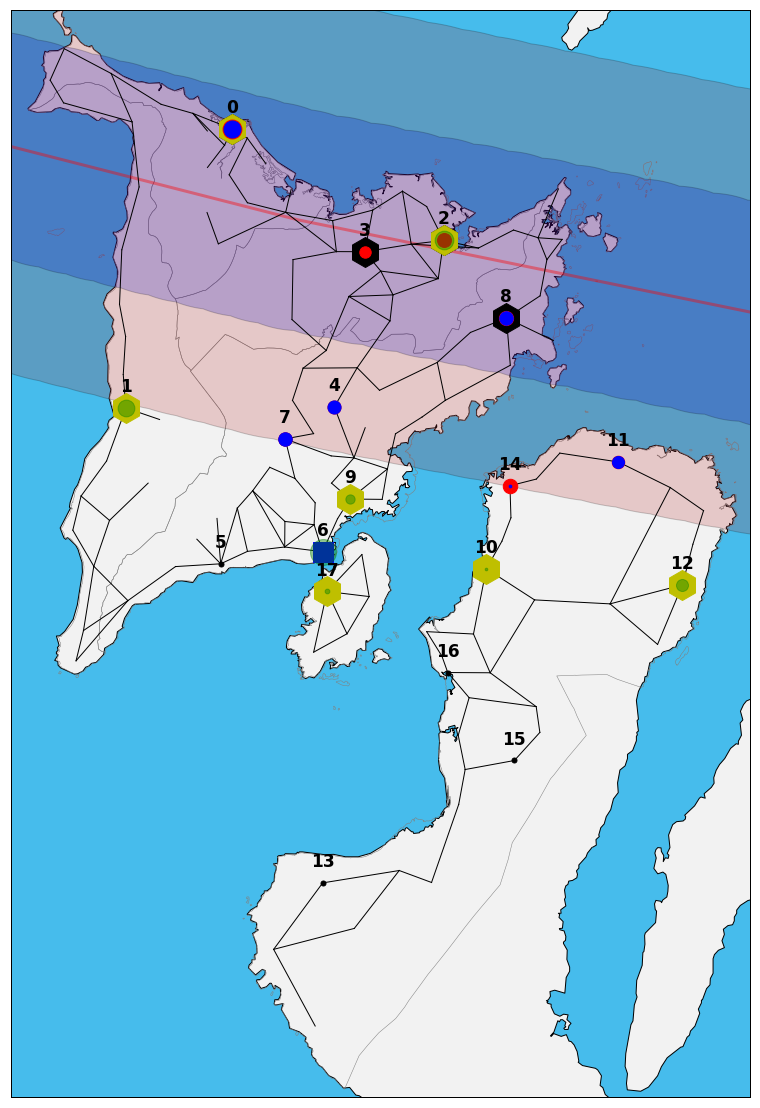

In [208]:
from Circles.circles import circle
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
from descartes import PolygonPatch
import numpy as np

#create basemap

lonmin = 121.8
lonmax = 123.6
latmin = 9.4
latmax = 12.0

fig, ax = plt.subplots(figsize=(20,20))
m = Basemap(resolution='h', # c, l, i, h, f or None
            projection='merc',
            llcrnrlon=lonmin, llcrnrlat= latmin, urcrnrlon=lonmax, urcrnrlat=latmax)

#draw best track
besttrackdf = besttrackdf[(besttrackdf[['Latitude','Longitude']] != 0).all(axis=1)]
q,r = m(besttrackdf['Longitude'].tolist(), besttrackdf['Latitude'].tolist())
m.plot(q, r, marker="o", markersize=0.1, linewidth=3, zorder=2, color = 'red', alpha = 0.4)

#generate best track affected area
forecastcone2 = generatebesttrackcone(besttrackdf,30,m)
mapforecastcone2 = PolygonPatch(forecastcone2, fc='#B22222', alpha=0.2, zorder=2)
ax.add_patch(mapforecastcone2)

#generate best track affected area (supply destroyed)
forecastcone3 = generatebesttrackcone2(besttrackdf,30,m)
mapforecastcone3 = PolygonPatch(forecastcone3, fc='#0000CD', alpha=0.2, zorder=2)
ax.add_patch(mapforecastcone3)

#draw map boundaries
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()

#draw town centers
x,y = m(visDPs['longitude'].tolist(), (visDPs['latitude']).tolist())
m.plot(x, y, 'ko', markersize=5, zorder=3)
xx, yy = m(resultDPs['longitude'].tolist(), (resultDPs['latitude']+0.03).tolist())
for i, txt in enumerate(townindex):
    plt.text(x = xx[i], y = yy[i], s = txt, fontsize=17, fontweight='bold',
             ha='center', 
             va='bottom',
             color='k',
             zorder=10)
# # class matplotlib.text.Text(x=0, y=0, 
#                            text='', 
#                            color=None, 
#                            verticalalignment='baseline',
#                            horizontalalignment='left', multialignment=None, fontproperties=None, rotation=None, linespacing=None, rotation_mode=None, usetex=None, wrap=False, 

#draw town centers demand
a,b = m(visDPs['longitude'].tolist(), visDPs['latitude'].tolist())
c = visDPs['size'].tolist()
for a1, b1, c1 in zip (a,b,c):
    m.plot(a1, b1, 'ro', markersize=c1, zorder=6)

#draw town centers amount supplied
f,g = m(resultDPs['longitude'].tolist(), resultDPs['latitude'].tolist())
h = resultDPs['AmtSupplysize'].tolist()
for as1, bs1, cs1 in zip (f,g,h):
    m.plot(as1, bs1, 'go', markersize=cs1, zorder=6, alpha = 0.4)

#draw town centers amount received
w,x = m(resultDPs['longitude'].tolist(), resultDPs['latitude'].tolist())
y = resultDPs['AmtRecvdsize'].tolist()
for w1, x1, y1 in zip (w,x,y):
    m.plot(w1, x1, 'bo', markersize=y1, zorder=7)

#draw town centers of destroyed supply centers
u,v = m(visDPsdest['longitude'].tolist(), visDPsdest['latitude'].tolist())
m.plot(u, v, 'hk', markersize=30, zorder=4)

#draw supply centers
u,v = m(supplyDPs['longitude'].tolist(), supplyDPs['latitude'].tolist())
m.plot(u, v, 'hy', markersize=30, zorder=5)

#draw RDC
i,j = m(rdc['longitude'].tolist(), rdc['latitude'].tolist())
m.plot(i, j, 'sb', markersize=20, zorder=4)
#balik

#draw town borders
# m.readshapefile('regionvi', "towns", linewidth = 0.5, color='gray')
m.readshapefile('westernv', 'westernv', linewidth = 0.5, color='gray')



#draw roads
for i in range(len(roads)):
    roadlon = [roads['startlon'][i],roads['endlon'][i]]
    roadlat = [roads['startlat'][i],roads['endlat'][i]]
    q,r = m(roadlon,roadlat)
    m.plot(q,r, marker=None, linewidth = 1, color='black')

In [ ]:
xii

In [280]:
compDPslist[-1][0].ActualDemand.sum()

313147.0

In [ ]:
xii